In [1]:
# 封装显示图片的函数
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

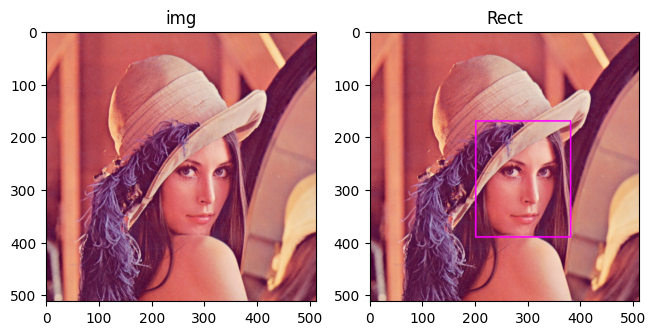

In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./lena.png')

imageRectangle = img.copy()
cv2.rectangle(imageRectangle, (200, 170), (380,390), (255, 0, 255), thickness=2, lineType=cv2.LINE_8);
plt.figure(figsize=[16,12]);
plt.subplot(141); plt.imshow(img[:,:,::-1]);plt.title("img");
plt.subplot(142); plt.imshow(imageRectangle[:,:,::-1]);plt.title("Rect");

In [ ]:
# 画出矩形框矩形框(x, y, w, h)，初始化前景区域
rect =(200, 170, 180, 220)

# 创建一个与图像大小相同的掩码，并初始化为0
mask = np.zeros(img.shape[:2], np.uint8)

# 执行GrabCut算法，第一次使用grabcut是用户指定rect
cv2.grabCut(img, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

# 将背景、可能的背景标记为0，前景、可能的前景标记为255
mask1 = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

# 应用掩码到图像上，得到分割后的图像
img_cut1 = cv2.bitwise_and(img, img, mask=mask1)

# 显示图像
plt.imshow(cv2.cvtColor(img_cut1, cv2.COLOR_BGR2RGB));plt.axis("off");plt.show();

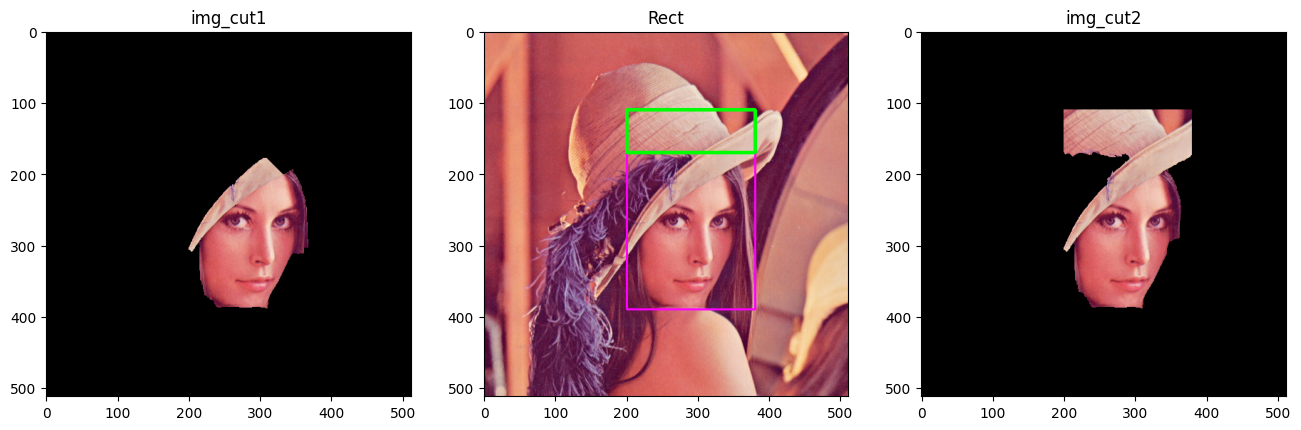

In [4]:
# 第二次使用grabcut, 对mask进行修改，将帽子部分区域设为前景。
mask[110:170, 200:380] = 1
cv2.grabCut(img, mask, None, None, None, 5, mode=cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask == 1) | (mask == 3), 255, 0).astype(np.uint8)
# # 使用与运算.
img_cut2 = cv2.bitwise_and(img, img, mask=mask2)
cv2.rectangle(imageRectangle, (200, 110), (380, 170), (0, 255, 0), 3)
plt.figure(figsize=[16,12]);
plt.subplot(131); plt.imshow(img_cut1[:,:,::-1]);plt.title("img_cut1");
plt.subplot(132); plt.imshow(imageRectangle[:,:,::-1]);plt.title("Rect");
plt.subplot(133); plt.imshow(img_cut2[:,:,::-1]);plt.title("img_cut2");

In [22]:


# 取出矩形框x, y, w, h
rect = (200, 170, 180, 210)
mask = np.zeros(img.shape[:2], dtype=np.uint8)
# mask是grabcut保存分割结果的矩阵.分割完之后有以下四种值.
# GCD_BGD（=0），背景；
# GCD_FGD（=1），前景；
# GCD_PR_BGD（=2），可能的背景；
# GCD_PR_FGD（=3），可能的前景。
# 第一次使用grabcut是用户指定rect 
cv2.grabCut(img, mask, rect, None, None, 5, mode=cv2.GC_INIT_WITH_RECT)

# 处理结果放在mask
# 我们把所有的前景抠出来.
mask1 = np.where((mask == 1) | (mask == 3), 255, 0).astype(np.uint8)
# 使用与运算.
output1 = cv2.bitwise_and(img, img, mask=mask1)
cv2.rectangle(img, (200, 170), (200 + 180, 170 + 210), (0, 0, 255), 3)
cv_show('output1', np.hstack((output1, img)))

# 第二次使用grabcut, 对mask进行修改..
mask[110:170, 200:380] = 1
cv2.grabCut(img, mask, None, None, None, 5, mode=cv2.GC_INIT_WITH_MASK)
mask2 = np.where((mask == 1) | (mask == 3), 255, 0).astype(np.uint8)
# 使用与运算.
output2 = cv2.bitwise_and(img, img, mask=mask2)
cv2.rectangle(img, (200, 110), (200 + 180, 60 + 110), (0, 255, 0), 3)
cv_show('output2', np.hstack((output1, img, output2)))

In [ ]:
# 根据grabcut的特性, 设计一个交互式的抠图应用. 可以根据鼠标框选的区域自动抠图.

In [5]:
cv2.setMouseCallback??

Docstring: setMouseCallback(windowName, onMouse [, param]) -> None
Type:      builtin_function_or_method

In [3]:
import cv2
import numpy as np

class grabCutAPP:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path)       
        self.drawing_image = self.image.copy()  		# 创建图片副本用于绘制           
        self.drawing = False							# 鼠标按下标志        
        self.start_point = (0, 0)						# 起始点坐标        
        self.end_point = (0, 0)						# 结束点坐标        
        self.draw_window = "Draw Rectangle"				# 标注窗口名称
        self.Segment_window = "Segment_image"
        self.mask = np.zeros(self.image.shape[:2], dtype=np.uint8)
        self.output = np.zeros(self.image.shape[:2], dtype=np.uint8)
        self.rect = (0, 0, 0, 0)
        
        

    def mouse_callback(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:				# 按下鼠标左键
            # 记录起始点，设置绘制状态
            self.drawing = True
            self.start_point = (x, y)
            self.end_point = (x, y)
            
        elif event == cv2.EVENT_MOUSEMOVE:				# 移动鼠标
            if self.drawing:                
                self.end_point = (x, y)					# 更新结束点位置                
                self.drawing_image = self.image.copy()	# 复制原图
                # 绘制绿色矩形
                cv2.rectangle(self.drawing_image, self.start_point, 
                            self.end_point, (0, 255, 0), 2)
                
        elif event == cv2.EVENT_LBUTTONUP:				# 释放鼠标            
            self.end_point = (x, y)						# 更新结束点位置
            self.drawing = False
            # 在原图上绘制红色矩形
            cv2.rectangle(self.image, self.start_point, 
                         self.end_point, (0, 0, 255), 2) 
            self.drawing_image = self.image.copy()		# 更新显示图片

    def run(self):        
        cv2.namedWindow(self.draw_window)				# 创建窗口
        # 设置鼠标回调函数
        cv2.setMouseCallback(self.draw_window, self.mouse_callback)

        while True:
            # 显示图片
            cv2.imshow(self.draw_window, self.drawing_image)
            cv2.imshow(self.Segment_window, self.output)
            # 检测按键，按ESC退出
            key=cv2.waitKey(1) 
            if key==27:
                break
            elif key==ord('g'):             
                self.rect = (min(self.start_point[0], self.end_point[0]), min(self.start_point[1], self.end_point[1]),
                         abs(self.start_point[0]-self.end_point[0]), abs(self.start_point[1]-self.end_point[1]))
                cv2.grabCut(self.image, self.mask,self.rect , None, None, 5, mode=cv2.GC_INIT_WITH_RECT)
            mask2 = np.where((self.mask == 1) | (self.mask == 3), 255, 0).astype(np.uint8)
                # 使用与运算.
            self.output = cv2.bitwise_and(self.image, self.image, mask=mask2)
                

        # 释放资源
        cv2.destroyAllWindows()

In [5]:
app = grabCutAPP("123.png")  # 替换为实际图片路径
app.run()

In [12]:
start_point=(2,3)
start_point[1]

3

In [9]:
cv2.Canny??

Docstring:
Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
.   @brief Finds edges in an image using the Canny algorithm @cite Canny86 .
.   
.   The function finds edges in the input image and marks them in the output map edges using the
.   Canny algorithm. The smallest value between threshold1 and threshold2 is used for edge linking. The
.   largest value is used to find initial segments of strong edges. See
.   <http://en.wikipedia.org/wiki/Canny_edge_detector>
.   
.   @param image 8-bit input image.
.   @param edges output edge map; single channels 8-bit image, which has the same size as image .
.   @param threshold1 first threshold for the hysteresis procedure.
.   @param threshold2 second threshold for the hysteresis procedure.
.   @param apertureSize aperture size for the Sobel operator.
.   @param L2gradient a flag, indicating whether a more accurate \f$L_2\f$ norm
.   \f$=\sqrt{(dI/dx)^2 + (dI/dy)^2}\f$ should be used to calculate the imag

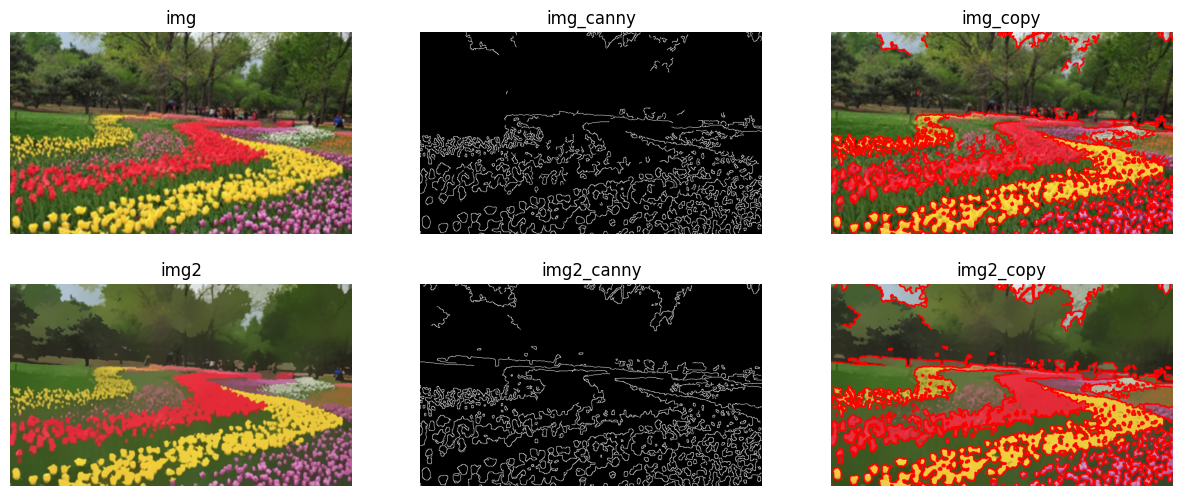

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片并使用MeanShift
img = cv2.imread('flower.png')
img2 = cv2.pyrMeanShiftFiltering(img, 20, 30)

# 边缘检测
img_canny = cv2.Canny(img, 150, 300)
img2_canny = cv2.Canny(img2, 150, 300)

# 查找并绘制轮廓
contours, _ = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(img2_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_copy,img2_copy=img.copy(),img2.copy()
cv2.drawContours(img_copy, contours, -1, (0, 0, 255), 2)
cv2.drawContours(img2_copy, contours2, -1, (0, 0, 255), 2)

plt.figure(figsize=[15,6]);
plt.subplot(231); plt.imshow(img[:,:,::-1]);plt.axis('off');plt.title("img");
plt.subplot(232); plt.imshow(img_canny,cmap='gray');plt.axis('off');plt.title("img_canny");
plt.subplot(233); plt.imshow(img_copy[:,:,::-1]);plt.axis('off');plt.title("img_copy");
plt.subplot(234); plt.imshow(img2[:,:,::-1]);plt.axis('off');plt.title("img2");
plt.subplot(235); plt.imshow(img2_canny,cmap='gray');plt.axis('off');plt.title("img2_canny");
plt.subplot(236); plt.imshow(img2_copy[:,:,::-1]);plt.axis('off');plt.title("img2_copy");

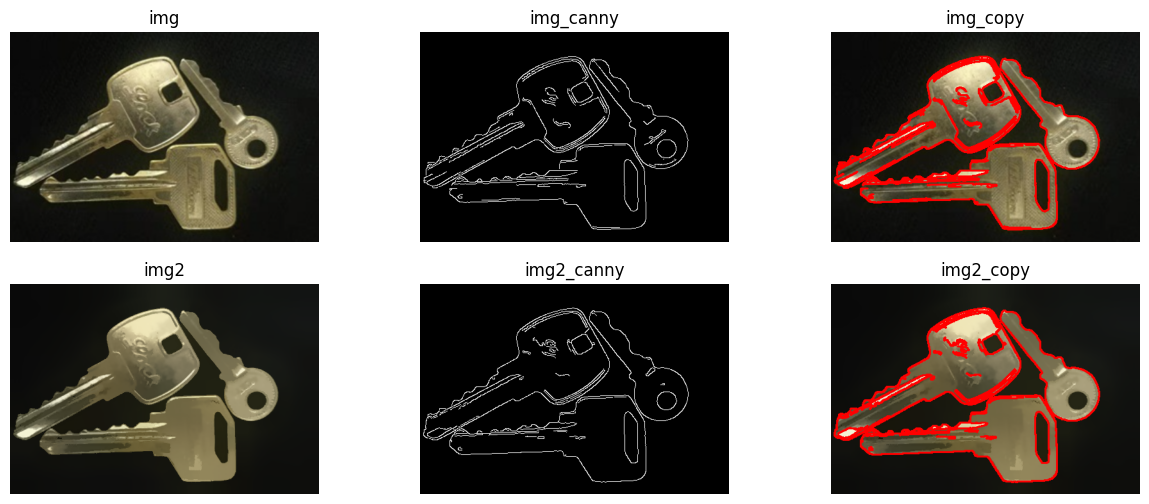

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片并使用MeanShift
img = cv2.imread('key.png')
img2 = cv2.pyrMeanShiftFiltering(img, 20, 30)

# 边缘检测
img_canny = cv2.Canny(img, 150, 300)
img2_canny = cv2.Canny(img2, 150, 300)

# 查找并绘制轮廓
contours, _ = cv2.findContours(img_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours2, _ = cv2.findContours(img2_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_copy,img2_copy=img.copy(),img2.copy()
cv2.drawContours(img_copy, contours, -1, (0, 0, 255), 2)
cv2.drawContours(img2_copy, contours2, -1, (0, 0, 255), 2)

plt.figure(figsize=[15,6]);
plt.subplot(231); plt.imshow(img[:,:,::-1]);plt.axis('off');plt.title("img");
plt.subplot(232); plt.imshow(img_canny,cmap='gray');plt.axis('off');plt.title("img_canny");
plt.subplot(233); plt.imshow(img_copy[:,:,::-1]);plt.axis('off');plt.title("img_copy");
plt.subplot(234); plt.imshow(img2[:,:,::-1]);plt.axis('off');plt.title("img2");
plt.subplot(235); plt.imshow(img2_canny,cmap='gray');plt.axis('off');plt.title("img2_canny");
plt.subplot(236); plt.imshow(img2_copy[:,:,::-1]);plt.axis('off');plt.title("img2_copy");

In [20]:
cv2.createBackgroundSubtractorMOG2??

Docstring:
createBackgroundSubtractorMOG2([, history[, varThreshold[, detectShadows]]]) -> retval
.   @brief Creates MOG2 Background Subtractor
.   
.   @param history Length of the history.
.   @param varThreshold Threshold on the squared Mahalanobis distance between the pixel and the model
.   to decide whether a pixel is well described by the background model. This parameter does not
.   affect the background update.
.   @param detectShadows If true, the algorithm will detect shadows and mark them. It decreases the
.   speed a bit, so if you do not need this feature, set the parameter to false.
Type:      builtin_function_or_method

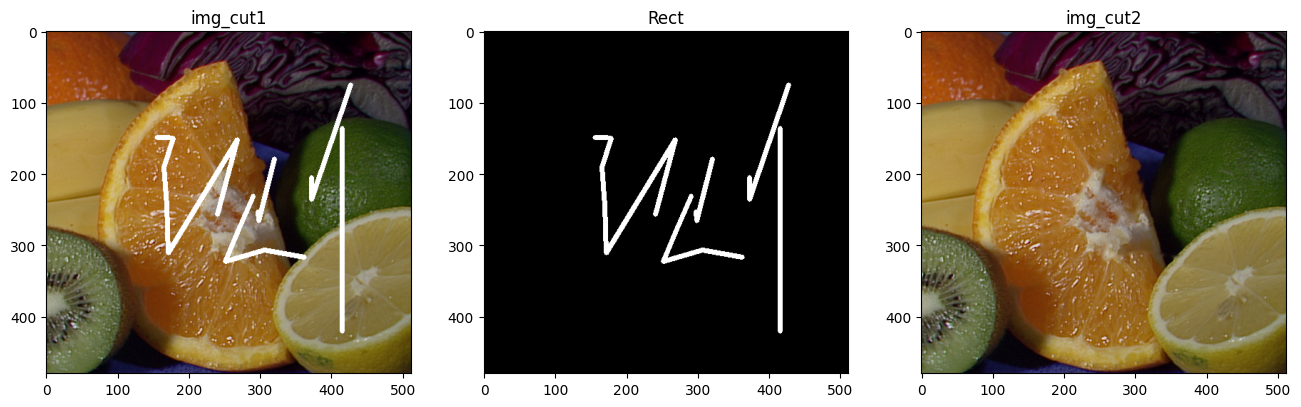

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图像
img = cv2.imread('inpaint.png')
# 掩码图像为二值图，损坏部分为白色(255)
mask = cv2.imread('inpaint_mask.png', 0)  

# 使用inpaint方法修复图像
dst = cv2.inpaint(img, mask, 5, cv2.INPAINT_TELEA)

# 显示原图和修复后的图像
plt.figure(figsize=[16,12]);
plt.subplot(131); plt.imshow(img[:,:,::-1]);plt.title("img_cut1");
plt.subplot(132); plt.imshow(mask,cmap='gray');plt.title("Rect");
plt.subplot(133); plt.imshow(dst[:,:,::-1]);plt.title("img_cut2");